## Análisis de los datos inciales

In [36]:
# Librerias necesarias 
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import joblib
from plotly.subplots import make_subplots

In [37]:
# Se cargan los datos preprocesados 
df = joblib.load('Data_final\\df.pkl')

In [38]:
expuestos = pd.read_csv('Data\BD_Expuestos.txt', sep = '\s+', encoding = 'latin-1')
sociodemograficas = pd.read_csv('Data\BD_Sociodemograficas.txt', sep = '\s+', encoding = 'latin-1')
siniestros = pd.read_csv('Data\DB_Siniestros.txt', sep = ',', encoding = 'latin-1')

### Analisis univariado 

In [39]:
df.head(3)

,Asegurado_Id,Sexo,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Reclamacion,Eventos,Valor_Pagado,Edad,Duracion_Poliza_Dias,Clasificacion_Diagnostico,Numero_Comorbilidades
0,18686469,1,Bogota,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,3,1.579219e+06,40,61,Diagnostico Pendiente,0.0
1,18686469,1,Bogota,0,0,0,0,0.0,CONSULTA EXTERNA,1,4.428056e+05,40,61,Diagnostico Pendiente,0.0
2,16087775,0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,4.616260e+05,40,729,Diagnostico Pendiente,0.0


,Enfermedad,Número de pacientes
0,CANCER,37050.0
1,EPOC,163480.0
2,DIABETES,493215.0
3,HIPERTENSION,134885.0
4,ENF_CARDIOVASCULAR,43231.0


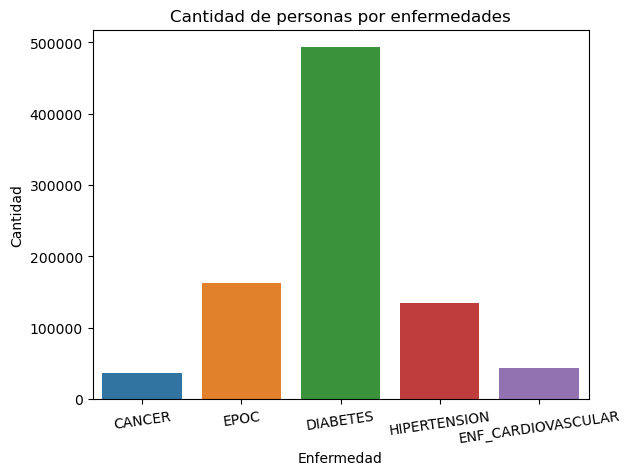

In [40]:
c1 = pd.DataFrame(df[['CANCER','EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR']].sum(), columns = ['Número de pacientes'])
c1 = c1.reset_index()
c1 = c1.rename(columns={'index':'Enfermedad'})
display(c1)
sns.barplot(c1, x='Enfermedad', y ='Número de pacientes')
plt.title('Cantidad de personas por enfermedades')
plt.ylabel('Cantidad')
plt.xticks(rotation = 8)
plt.show()

**Reclamaciones**

,Reclamacion,Cantidad
9,CONSULTA EXTERNA,1437152
13,EXAMENES DE DIAGNOSTICO,790959
18,LABORATORIO CLINICO,592603
8,CONSULTA DE URGENCIAS,419581
4,CIRUGIA AMBULATORIA POR ENFERMEDAD,120737
15,FISIOTERAPIA ILIMITADA,112413
39,TRATAMIENTOS ESPECIFICOS,59241
26,TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES,44754
10,CONSULTAS PRENATALES,38696
31,TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD,32480


c:\Users\ESTEBAN\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 141 (\x8d) missing from current font.



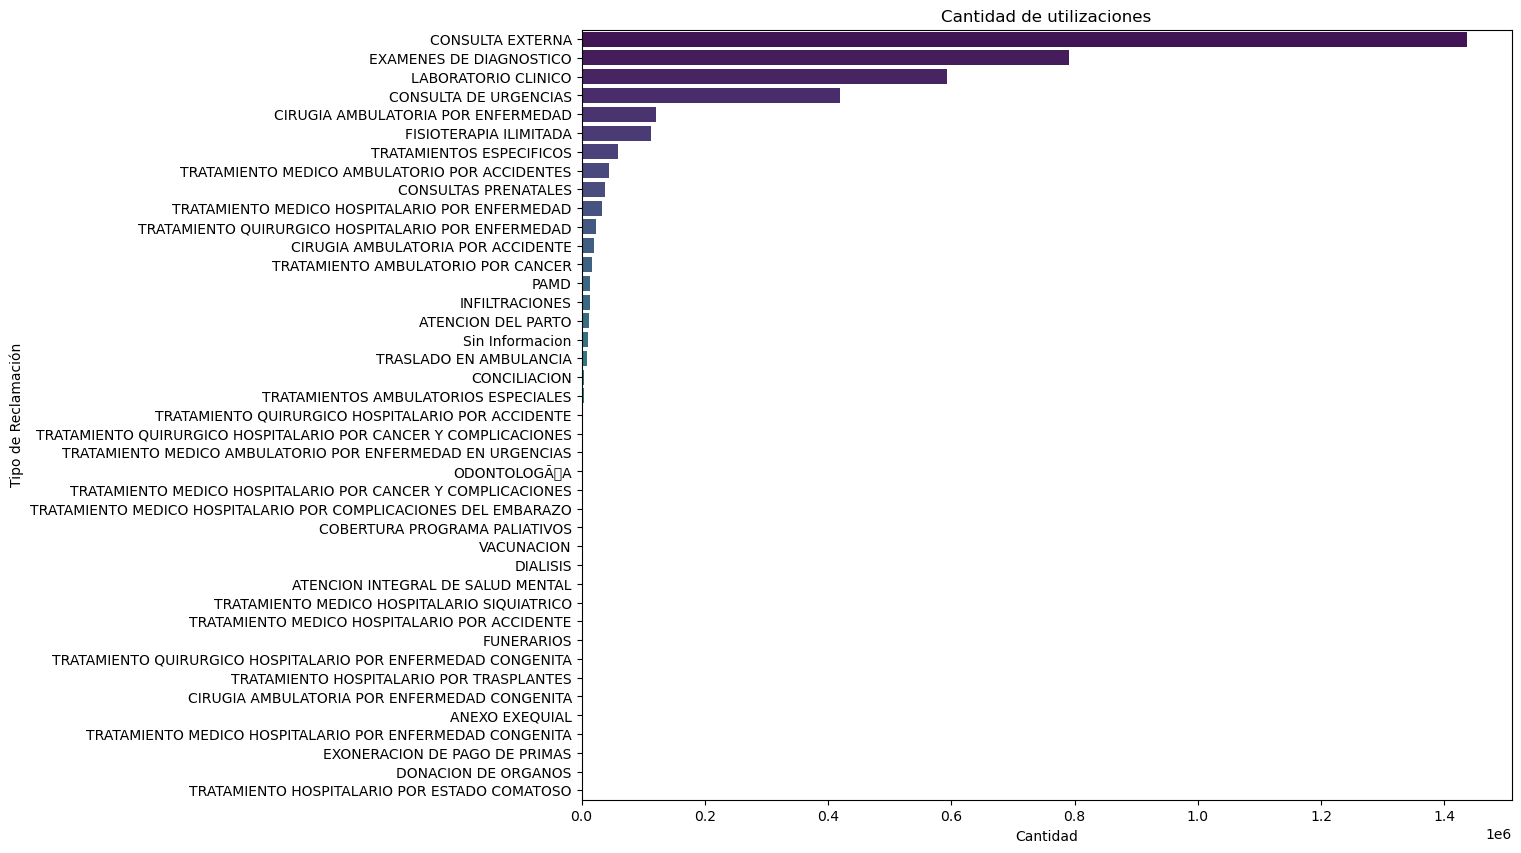

In [41]:
conteo_reclamaciones = df.groupby('Reclamacion').size().reset_index(name='Cantidad')
conteo_reclamaciones = conteo_reclamaciones.sort_values(by='Cantidad', ascending=False)
display(conteo_reclamaciones)

plt.figure(figsize=(12, 10))
sns.barplot(x='Cantidad', y='Reclamacion', data=conteo_reclamaciones, palette='viridis')
plt.title('Cantidad de utilizaciones')
plt.xlabel('Cantidad')
plt.ylabel('Tipo de Reclamación')
plt.show()

**Eventos por cada reclamación**

C:\Users\ESTEBAN\AppData\Local\Temp\ipykernel_14932\1608972843.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\ESTEBAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



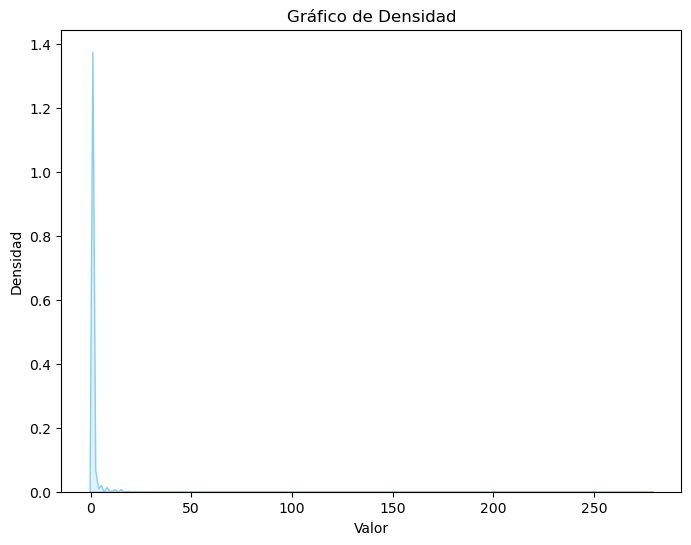

In [42]:
plt.figure(figsize=(8, 6))

# Crear gráfico de densidad usando seaborn
sns.kdeplot(df['Eventos'], shade=True, color='skyblue')

# Añadir título y etiquetas
plt.title('Gráfico de Densidad')
plt.xlabel('Valor')
plt.ylabel('Densidad')

# Mostrar el gráfico de densidad
plt.show()

**Distribución de Valor Pagado**

C:\Users\ESTEBAN\AppData\Local\Temp\ipykernel_14932\3933719316.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\ESTEBAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



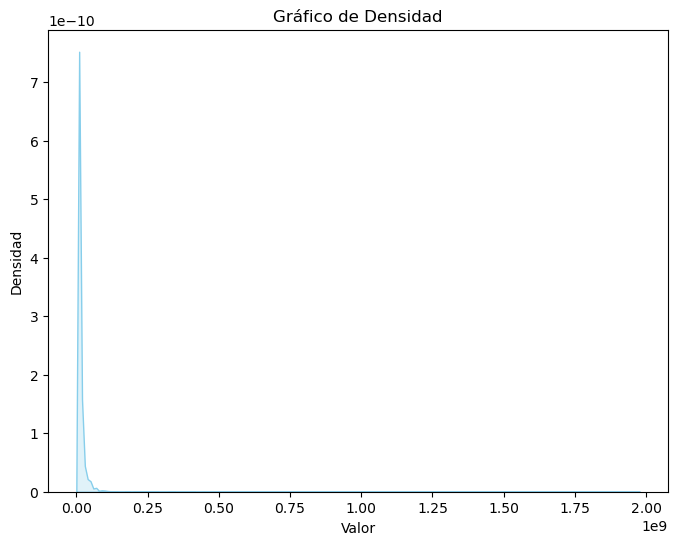

In [43]:
plt.figure(figsize=(8, 6))

# Crear gráfico de densidad usando seaborn
sns.kdeplot(df['Valor_Pagado'], shade=True, color='skyblue')

# Añadir título y etiquetas
plt.title('Gráfico de Densidad')
plt.xlabel('Valor')
plt.ylabel('Densidad')

# Mostrar el gráfico de densidad
plt.show()

**Distribución de la edad de los asegurados**

c:\Users\ESTEBAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\ESTEBAN\AppData\Local\Temp\ipykernel_14932\1488609397.py:10: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


c:\Users\ESTEBAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



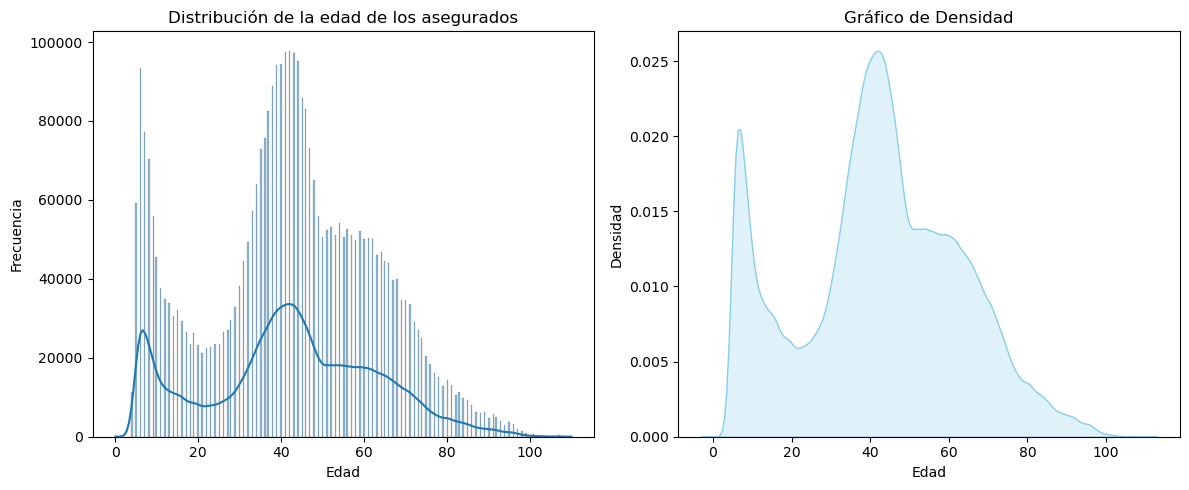

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Graficar el histograma 
sns.histplot(df['Edad'], kde=True, ax=axs[0])  
axs[0].set_title('Distribución de la edad de los asegurados')
axs[0].set_xlabel('Edad')
axs[0].set_ylabel('Frecuencia')

# Graficar el gráfico de densidad 
sns.kdeplot(df['Edad'], shade=True, color='skyblue', ax=axs[1])
axs[1].set_title('Gráfico de Densidad')
axs[1].set_xlabel('Edad')
axs[1].set_ylabel('Densidad')

# Ajustar automáticamente los espacios entre los subgráficos para que no haya superposiciones
plt.tight_layout()

# Mostrar la figura con ambos gráficos
plt.show()

**Distribución de la duración de la póliza**

c:\Users\ESTEBAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



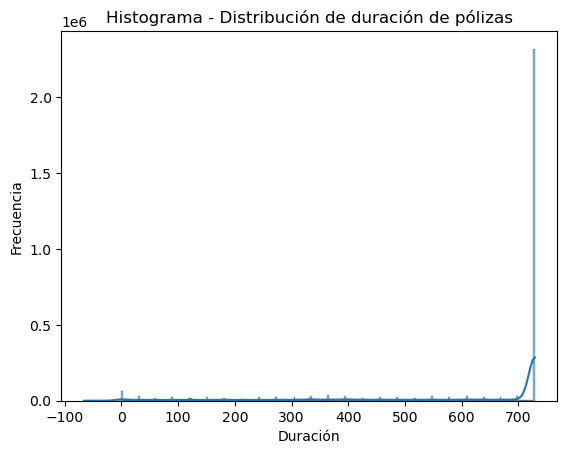

In [45]:
# Graficar el histograma 
sns.histplot(df['Duracion_Poliza_Dias'], kde=True)  
plt.title('Histograma - Distribución de duración de pólizas')
plt.xlabel('Duración')
plt.ylabel('Frecuencia')

# Mostrar el gráfico de densidad
plt.show()

Observamos que hay algunas duraciones de pólizas menores a 0 días. Esto indica que en la columna FECHA_CANCELACION hay una fecha anterior a FECHA_INICIO. Esto claramente es un error en la digitación de los datos por lo cual debemos tomar una decisión con respecto a qué hacer con estos registros. 

In [46]:
df.loc[df['Duracion_Poliza_Dias']<0].head()

,Asegurado_Id,Sexo,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Reclamacion,Eventos,Valor_Pagado,Edad,Duracion_Poliza_Dias,Clasificacion_Diagnostico,Numero_Comorbilidades
304886,55027756,0,Cartagena,0,0,0,0,0.0,CONSULTA EXTERNA,1,403623.960642,11,-19,Diagnostico Pendiente,0.0
304889,55027756,0,Cartagena,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,1,415363.784642,11,-19,Diagnostico Pendiente,0.0
304892,55027756,0,Cartagena,0,0,0,0,0.0,CONSULTA EXTERNA,2,455572.681842,11,-19,Diagnostico Pendiente,0.0
304895,55027756,0,Cartagena,0,0,0,0,0.0,CONSULTA EXTERNA,1,435174.737642,11,-19,Diagnostico Pendiente,0.0
304898,55027756,0,Cartagena,0,0,0,0,0.0,CONSULTA EXTERNA,1,435174.737642,11,-19,Diagnostico Pendiente,0.0


**Diagnósticos**

,Clasificacion_Diagnostico,Cantidad
2,Diagnostico Pendiente,3129700
15,Factores que influyen en el estado de salud (S...,201255
16,Lesiones traumaticas,51684
19,Pruebas complementarias,50499
21,nan,50196
18,Neoplasias,43964
12,Enfermedades digestivas,41637
7,Enfermedades del aparato genitourinario,33516
14,Enfermedades respiratorias,26944
6,Enfermedades del aparato circulatorio,26144


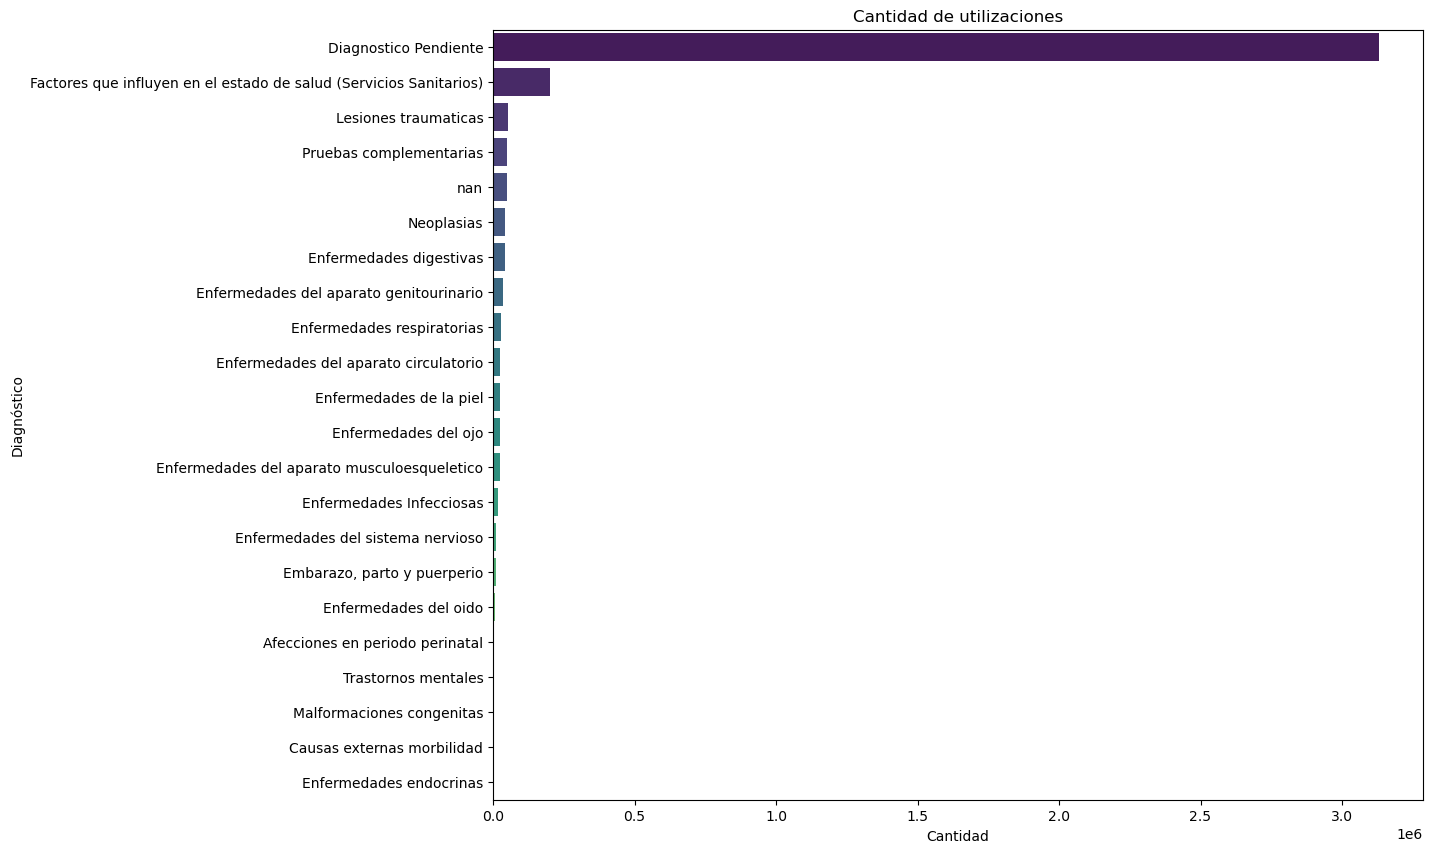

In [47]:
conteo_diagnosticos = df.groupby('Clasificacion_Diagnostico').size().reset_index(name='Cantidad')
conteo_diagnosticos = conteo_diagnosticos.sort_values(by='Cantidad', ascending=False)
display(conteo_diagnosticos)

plt.figure(figsize=(12, 10))
sns.barplot(x='Cantidad', y='Clasificacion_Diagnostico', data=conteo_diagnosticos, palette='viridis')
plt.title('Cantidad de utilizaciones')
plt.xlabel('Cantidad')
plt.ylabel('Diagnóstico')
plt.show()

**Número de comorbilidades**

,Numero_Comorbilidades,Cantidad
0,0.0,3115912
1,1.0,497631
2,2.0,134285
3,3.0,28352
4,4.0,5151


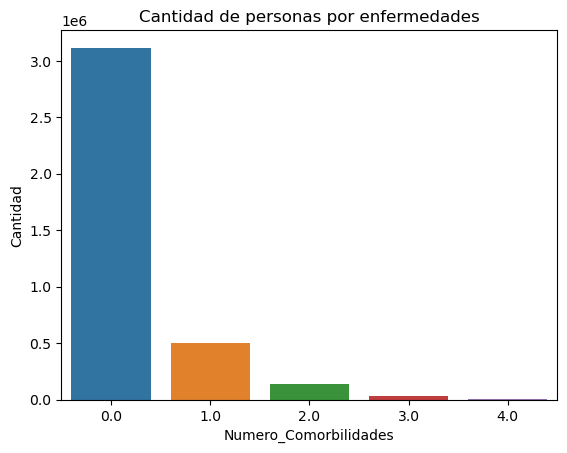

In [48]:
conteo_morbilidades= df.groupby('Numero_Comorbilidades').size().reset_index(name='Cantidad')
conteo_morbilidades = conteo_morbilidades.sort_values(by='Cantidad', ascending=False)
display(conteo_morbilidades)

sns.barplot(conteo_morbilidades, x='Numero_Comorbilidades', y ='Cantidad')
plt.title('Cantidad de personas por enfermedades')
plt.ylabel('Cantidad')
plt.show()

In [49]:
# Lista de variables binarias
variables = ['CANCER', 'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR', 'Sexo', 'Ciudad']

# Crear un gráfico de torta para cada variable
for variable in variables:
    # Contar el número de ocurrencias de cada categoría en la variable
    attrition_counts = df[variable].value_counts()
    
    # Crear el gráfico de torta con la paleta de colores personalizada
    fig = px.pie(values=attrition_counts, 
                 names=attrition_counts.index, 
                 title=f'Distribución de {variable}')
    fig.show()

## Análisis bivariado ##

,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
Costos totales,4.812181e+10,2.700052e+11,4.578205e+11,1.294142e+11,5.606105e+10


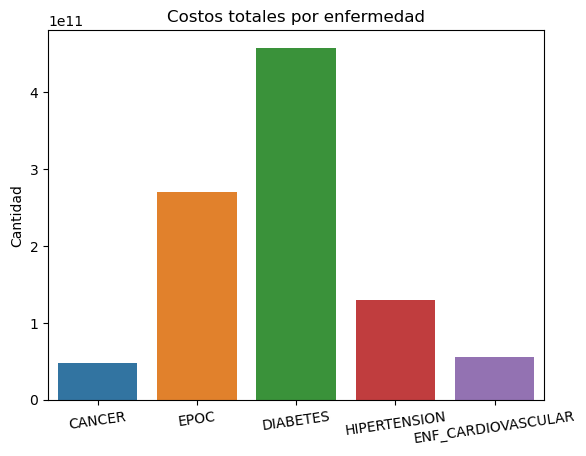

In [50]:
costos_cancer = df.loc[df['CANCER'] == 1]
costos_cancer = costos_cancer[['CANCER','Valor_Pagado']]

costos_epoc = df.loc[df['EPOC'] == 1]
costos_epoc = costos_epoc[['EPOC','Valor_Pagado']]

costos_diabetes = df.loc[df['DIABETES'] == 1]
costos_diabetes = costos_diabetes[['DIABETES','Valor_Pagado']]

costos_hipertension = df.loc[df['HIPERTENSION'] == 1]
costos_hipertension = costos_hipertension[['HIPERTENSION','Valor_Pagado']]

costos_cardiovascular = df.loc[df['ENF_CARDIOVASCULAR'] == 1]
costos_cardiovascular = costos_cardiovascular[['ENF_CARDIOVASCULAR','Valor_Pagado']]

costos_totales = {'CANCER':costos_cancer['Valor_Pagado'].sum(),
                 'EPOC': costos_epoc['Valor_Pagado'].sum(), 
                 'DIABETES': costos_diabetes['Valor_Pagado'].sum(), 
                 'HIPERTENSION': costos_hipertension['Valor_Pagado'].sum(), 
                 'ENF_CARDIOVASCULAR': costos_cardiovascular['Valor_Pagado'].sum()}

df_costos = pd.DataFrame(costos_totales, index=['Costos totales'])
display(df_costos)

sns.barplot(df_costos)
plt.title('Costos totales por enfermedad')
plt.ylabel('Cantidad')
plt.xticks(rotation = 8)
plt.show()


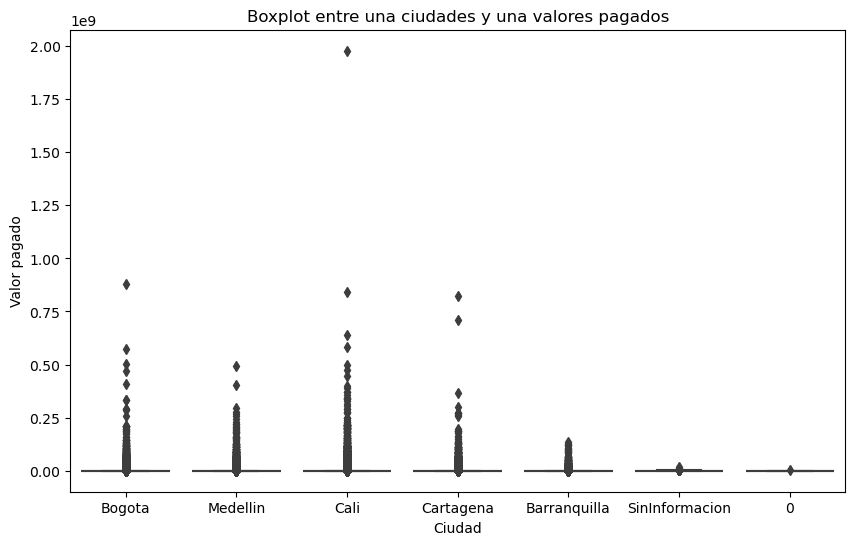

In [51]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Ciudad', y='Valor_Pagado', data=df)

# Añadir título y etiquetas
plt.title('Boxplot entre una ciudades y una valores pagados')
plt.xlabel('Ciudad')
plt.ylabel('Valor pagado')

# Mostrar el gráfico
plt.show()

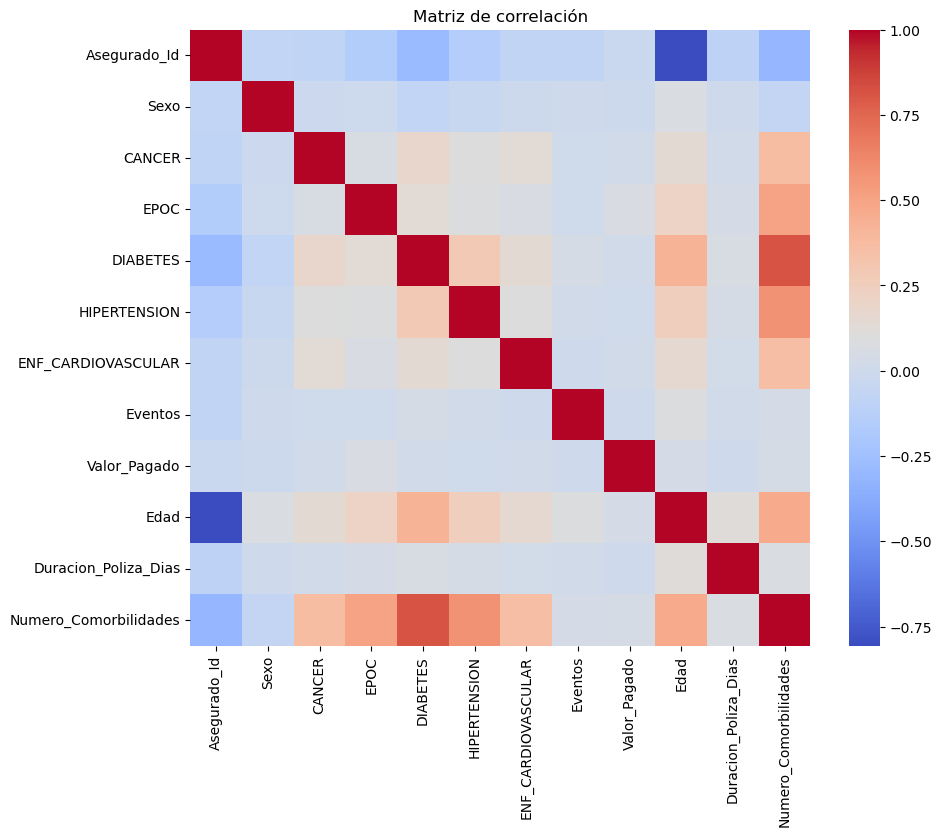

In [52]:
df_numeric = df.select_dtypes(include='number')

# Generar matriz de correlación
correlation_matrix = df_numeric.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')

# Añadir título
plt.title('Matriz de correlación')

# Mostrar el gráfico
plt.show()

# Preprocesamiento 2 - Despues de análisis exploratorio #

In [53]:
# Inicialmente se van a reemplazar registros que en el fondo sean nulos para tratarlos como tal 
df = df.replace('SinInformacion', np.nan) # Sin Informacion implica un valor nulo 
df = df.replace('0', np.nan) # Un cero como string realmente es un nulo
df = df.replace(-1, np.nan) # Un -1 como string realmente es un nulo 
df = df.replace('nan', np.nan)

In [54]:
df.isnull().sum()

Asegurado_Id                     0
Sexo                            36
Ciudad                         624
CANCER                           0
EPOC                             0
DIABETES                         0
HIPERTENSION                     0
ENF_CARDIOVASCULAR              12
Reclamacion                      0
Eventos                          0
Valor_Pagado                     0
Edad                             0
Duracion_Poliza_Dias            19
Clasificacion_Diagnostico    50196
Numero_Comorbilidades           12
dtype: int64

**Imputación de nulos**

In [55]:
# Imputamos la media del sexo por la media. 
df['Sexo'].fillna(df['Sexo'].mode()[0], inplace = True)
df['Ciudad'].fillna(df['Ciudad'].mode()[0], inplace = True)
df['ENF_CARDIOVASCULAR'].fillna(df['ENF_CARDIOVASCULAR'].mode()[0], inplace = True)
df['Duracion_Poliza_Dias'].fillna(df['Duracion_Poliza_Dias'].mode()[0], inplace = True)
df['Numero_Comorbilidades'].fillna(df['Numero_Comorbilidades'].mode()[0], inplace = True)
df['Clasificacion_Diagnostico'].fillna(df['Clasificacion_Diagnostico'].mode()[0], inplace = True)

In [56]:
df

,Asegurado_Id,Sexo,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Reclamacion,Eventos,Valor_Pagado,Edad,Duracion_Poliza_Dias,Clasificacion_Diagnostico,Numero_Comorbilidades
0,18686469,1.0,Bogota,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,3,1.579219e+06,40,61.0,Diagnostico Pendiente,0.0
1,18686469,1.0,Bogota,0,0,0,0,0.0,CONSULTA EXTERNA,1,4.428056e+05,40,61.0,Diagnostico Pendiente,0.0
2,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,4.616260e+05,40,729.0,Diagnostico Pendiente,0.0
3,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,5.930548e+05,40,729.0,Diagnostico Pendiente,0.0
4,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,4.552572e+05,40,729.0,Diagnostico Pendiente,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781431,4419287,1.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,4.420866e+05,73,729.0,Diagnostico Pendiente,0.0
3781432,4419287,1.0,Medellin,0,0,0,0,0.0,CIRUGIA AMBULATORIA POR ENFERMEDAD,1,7.140975e+06,73,729.0,Enfermedades del ojo,0.0
3781433,4419287,1.0,Medellin,0,0,0,0,0.0,FISIOTERAPIA ILIMITADA,24,8.416661e+05,73,729.0,Diagnostico Pendiente,0.0
3781434,4419287,1.0,Medellin,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,3,1.352497e+06,73,729.0,Diagnostico Pendiente,0.0


In [57]:
df.isnull().sum()

Asegurado_Id                 0
Sexo                         0
Ciudad                       0
CANCER                       0
EPOC                         0
DIABETES                     0
HIPERTENSION                 0
ENF_CARDIOVASCULAR           0
Reclamacion                  0
Eventos                      0
Valor_Pagado                 0
Edad                         0
Duracion_Poliza_Dias         0
Clasificacion_Diagnostico    0
Numero_Comorbilidades        0
dtype: int64

In [58]:
# Clasificación de las reclamaciones 
hospitalaria = ['CIRUGIA AMBULATORIA POR ACCIDENTE','CIRUGIA AMBULATORIA POR ENFERMEDAD','TRASLADO EN AMBULANCIA','TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD',
                'ATENCION DEL PARTO','TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD','TRATAMIENTO QUIRURGICO HOSPITALARIO POR ACCIDENTE',
                'TRATAMIENTO QUIRURGICO HOSPITALARIO POR CANCER Y COMPLICACIONES','TRATAMIENTO MEDICO HOSPITALARIO POR COMPLICACIONES DEL EMBARAZO',
                'TRATAMIENTO MEDICO HOSPITALARIO POR CANCER Y COMPLICACIONES','TRATAMIENTO MEDICO HOSPITALARIO SIQUIATRICO','CIRUGIA AMBULATORIA POR ENFERMEDAD CONGENITA',
                'TRATAMIENTO MEDICO HOSPITALARIO POR ACCIDENTE','TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD CONGENITA','TRATAMIENTO HOSPITALARIO POR TRASPLANTES',
                'TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD CONGENITA','TRATAMIENTO HOSPITALARIO POR ESTADO COMATOSO']
ambulatoria = ['EXAMENES DE DIAGNOSTICO','CONSULTA EXTERNA','CONSULTA DE URGENCIAS','LABORATORIO CLINICO','TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES','FISIOTERAPIA ILIMITADA',
               'TRATAMIENTOS ESPECIFICOS','INFILTRACIONES','PAMD','CONSULTAS PRENATALES','CONCILIACION','TRATAMIENTO AMBULATORIO POR CANCER','TRATAMIENTOS AMBULATORIOS ESPECIALES',
               'TRATAMIENTO MEDICO AMBULATORIO POR ENFERMEDAD EN URGENCIAS','ODONTOLOGÃ\x8dA','ATENCION INTEGRAL DE SALUD MENTAL','COBERTURA PROGRAMA PALIATIVOS','VACUNACION',
               'DIALISIS']
otras = ['Sin Informacion', 'ANEXO EXEQUIAL','FUNERARIOS','DONACION DE ORGANOS','EXONERACION DE PAGO DE PRIMAS']

In [59]:
# Función para categorizar
def clasificar_reclamacion(descripcion):
  
  if descripcion in hospitalaria: 
    return "Hospitalaria"
  elif descripcion in ambulatoria: 
    return "Ambulatoria"
  else:
    return "Otra"

In [60]:
df["Tipo_Reclamacion"] = df["Reclamacion"].apply(clasificar_reclamacion)

In [61]:
df

,Asegurado_Id,Sexo,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Reclamacion,Eventos,Valor_Pagado,Edad,Duracion_Poliza_Dias,Clasificacion_Diagnostico,Numero_Comorbilidades,Tipo_Reclamacion
0,18686469,1.0,Bogota,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,3,1.579219e+06,40,61.0,Diagnostico Pendiente,0.0,Ambulatoria
1,18686469,1.0,Bogota,0,0,0,0,0.0,CONSULTA EXTERNA,1,4.428056e+05,40,61.0,Diagnostico Pendiente,0.0,Ambulatoria
2,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,4.616260e+05,40,729.0,Diagnostico Pendiente,0.0,Ambulatoria
3,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,5.930548e+05,40,729.0,Diagnostico Pendiente,0.0,Ambulatoria
4,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,4.552572e+05,40,729.0,Diagnostico Pendiente,0.0,Ambulatoria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781431,4419287,1.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,4.420866e+05,73,729.0,Diagnostico Pendiente,0.0,Ambulatoria
3781432,4419287,1.0,Medellin,0,0,0,0,0.0,CIRUGIA AMBULATORIA POR ENFERMEDAD,1,7.140975e+06,73,729.0,Enfermedades del ojo,0.0,Hospitalaria
3781433,4419287,1.0,Medellin,0,0,0,0,0.0,FISIOTERAPIA ILIMITADA,24,8.416661e+05,73,729.0,Diagnostico Pendiente,0.0,Ambulatoria
3781434,4419287,1.0,Medellin,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,3,1.352497e+06,73,729.0,Diagnostico Pendiente,0.0,Ambulatoria


In [62]:

# Cantidad de reclamaciones por su tipo 
count = df.groupby('Tipo_Reclamacion').size().reset_index(name = 'Cantidad')

# Costos por el tipo de reclamación
df["Valor_Pagado"] = df["Valor_Pagado"].astype(int)
cost = df.groupby('Tipo_Reclamacion')['Valor_Pagado'].sum().reset_index(name = 'Costos')

# Gráfica
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "xy"}, {"type": "domain"}]]
)

fig.add_trace(
    go.Bar(x = count['Tipo_Reclamacion'], y = count['Cantidad'], name = 'Cantidad de reclamaciones por su tipo', marker_color = 'cadetblue'),
    row = 1, col = 1
)
fig.add_trace(
    go.Pie( labels = cost['Tipo_Reclamacion'], values = cost['Costos'], name = 'Costos por el tipo de reclamación'),
    row = 1, col = 2
)
fig.update_layout(
    title_text = 'Cantidad de reclamaciones por su tipo y sus costos asociados',
    template = 'simple_white')
fig.show();

In [63]:
# Tabla porcentual de cantidad y de costos 
can_amb = round((count["Cantidad"][0]/count["Cantidad"].sum()*100),2)
can_hos = round((count["Cantidad"][1]/count["Cantidad"].sum()*100),2)
can_otr = round((count["Cantidad"][2]/count["Cantidad"].sum()*100),2)

cos_amb = round((cost["Costos"][0]/cost["Costos"].sum()*100),2)
cos_hos = round((cost["Costos"][1]/cost["Costos"].sum()*100),2)
cos_otr = round((cost["Costos"][2]/cost["Costos"].sum()*100),2)

datos = {'Tipo de reclamación': ['Ambulatoria', 'Hospitalaria', 'Otros'],
         'Cantidad': [can_amb, can_hos, can_otr],
         'Costos': [cos_amb, cos_hos, cos_otr]}

tabla = pd.DataFrame(datos)
tabla

,Tipo de reclamación,Cantidad,Costos
0,Ambulatoria,93.88,72.19
1,Hospitalaria,5.85,27.64
2,Otros,0.28,0.17


# Filtros para base de datos #

In [64]:
# Filtro 1: personas que no tengan comorbilidades 
df_final_reclamaciones = df.loc[df['Numero_Comorbilidades'] == 0]

# Filtro 2 - personas que hayan hecho reclamaciones ambulatorias 
df_final_reclamaciones = df.query("Tipo_Reclamacion == 'Ambulatoria'")

# Filtro 3 - personas entre los 20 y lo 50 años 
filtro_edad = (df_final_reclamaciones['Edad']>20 ) & (df_final_reclamaciones['Edad']<50)
df_final_reclamaciones = df_final_reclamaciones[filtro_edad]

df_final_reclamaciones.drop(['Tipo_Reclamacion'], inplace = True, axis = 1)
df_final_reclamaciones.drop(['Numero_Comorbilidades'], inplace = True, axis = 1)

In [67]:
df_final_reclamaciones

,Asegurado_Id,Sexo,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Reclamacion,Eventos,Valor_Pagado,Edad,Duracion_Poliza_Dias,Clasificacion_Diagnostico
0,18686469,1.0,Bogota,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,3,1579219,40,61.0,Diagnostico Pendiente
1,18686469,1.0,Bogota,0,0,0,0,0.0,CONSULTA EXTERNA,1,442805,40,61.0,Diagnostico Pendiente
2,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,461626,40,729.0,Diagnostico Pendiente
3,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,593054,40,729.0,Diagnostico Pendiente
4,16087775,0.0,Medellin,0,0,0,0,0.0,CONSULTA DE URGENCIAS,1,455257,40,729.0,Diagnostico Pendiente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3781400,34178573,1.0,Cali,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,1,579721,45,729.0,Pruebas complementarias
3781401,34178573,1.0,Cali,0,0,0,0,0.0,EXAMENES DE DIAGNOSTICO,1,479786,45,729.0,Diagnostico Pendiente
3781402,34178573,1.0,Cali,0,0,0,0,0.0,LABORATORIO CLINICO,1,675070,45,729.0,Diagnostico Pendiente
3781403,34178573,1.0,Cali,0,0,0,0,0.0,CONSULTA EXTERNA,2,565193,45,729.0,Diagnostico Pendiente


In [69]:
import joblib 
joblib.dump(df_final_reclamaciones, 'Data_final\\df_final_reclamaciones.pkl')

['Data_final\\df_final_reclamaciones.pkl']